### Import packages and data.

In [1]:
import pandas as pd
import numpy as np
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
##from graphviz import Graph

<b> NOTE: python-graphviz must first be installed in order to run the above import.

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report

In [3]:
facebook = pd.read_csv('Features_Variant_1.csv', header=None)
test1 = pd.read_csv('Test_Case_1.csv', header=None)
test2 = pd.read_csv('Test_Case_2.csv', header=None)
test3 = pd.read_csv('Test_case_3.csv', header=None)
test4 = pd.read_csv('Test_case_4.csv', header=None)
test5 = pd.read_csv('Test_case_5.csv', header=None)
test6 = pd.read_csv('Test_case_6.csv', header=None)
test7 = pd.read_csv('Test_case_7.csv', header=None)
test8 = pd.read_csv('Test_case_8.csv', header=None)
test9 = pd.read_csv('Test_case_9.csv', header=None)
test10 = pd.read_csv('Test_case_10.csv', header=None)

In [4]:
facebook = facebook.append([test1, test2, test3, test4, test5, test6, test7, test8, test9, test10], ignore_index=True)

In [5]:
new_names = ['PagePopularity_1', 'PageCheckins_2', 'PageTalkingAbout_3', 'PageCategory_4']
old_names = facebook.columns[0:4]
facebook.rename(columns=dict(zip(old_names, new_names)), inplace=True)

new_names2 = ['CommentsBeforeBase_30', 'CommentsLast24h_31', 'CommentsLast48to24h_32', 'CommentsFirst24h_33', 'CommentsDiffFirstSecondDay_34', 'BaseTime_35',
'PostLength_36', 'PostShareCnt_37', 'PostPromoStatus_38', 'HoursReceived_39', 'SundayPublished_40', 'MondayPublished_41', 'TuesdayPublisher_42',
'WednesdayPublished_43', 'ThursdayPublished_44', 'FridayPublished_45', 'SaturdayPublished_46', 'SundayBase_47', 'MondayBase_48', 'TuesdayBase_49',
'WednesdayBase_50', 'ThursdayBase_51', 'FridayBase_52', 'SaturdayBase_53','CommentsNextH_Hours_54']
old_names2 = facebook.columns[29:54]
facebook.rename(columns=dict(zip(old_names2, new_names2)), inplace=True)

facebook2 = facebook.iloc[:, np.r_[0:4, 29:54]]
facebook2 = facebook2.drop('PostPromoStatus_38', axis=1)

### Feature Scaling.

In [6]:
mean_1 = sum(facebook2['PagePopularity_1'])/len(facebook2['PagePopularity_1'])
sd_1 = np.std(facebook2['PagePopularity_1'])
mean_2 = sum(facebook2['PageCheckins_2'])/len(facebook2['PageCheckins_2'])
sd_2 = np.std(facebook2['PageCheckins_2'])
mean_3 = sum(facebook2['PageTalkingAbout_3'])/len(facebook2['PageTalkingAbout_3'])
sd_3 = np.std(facebook2['PageTalkingAbout_3'])
mean_4 = sum(facebook2['PageCategory_4'])/len(facebook2['PageCategory_4'])
sd_4 = np.std(facebook2['PageCategory_4'])
mean_30 = sum(facebook2['CommentsBeforeBase_30'])/len(facebook2['CommentsBeforeBase_30'])
sd_30 = np.std(facebook2['CommentsBeforeBase_30'])
mean_31 = sum(facebook2['CommentsLast24h_31'])/len(facebook2['CommentsLast24h_31'])
sd_31 = np.std(facebook2['CommentsLast24h_31'])
mean_32= sum(facebook2['CommentsLast48to24h_32'])/len(facebook2['CommentsLast48to24h_32'])
sd_32 = np.std(facebook2['CommentsLast48to24h_32'])
mean_33= sum(facebook2['CommentsFirst24h_33'])/len(facebook2['CommentsFirst24h_33'])
sd_33 = np.std(facebook2['CommentsFirst24h_33'])
mean_34 = sum(facebook2['CommentsDiffFirstSecondDay_34'])/len(facebook2['CommentsDiffFirstSecondDay_34'])
sd_34 = np.std(facebook2['CommentsDiffFirstSecondDay_34'])
### find out if you should scale BaseTime 
mean_36 = sum(facebook2['PostLength_36'])/len(facebook2['PostLength_36'])
sd_36 = np.std(facebook2['PostLength_36'])
mean_37 = sum(facebook2['PostShareCnt_37'])/len(facebook2['PostShareCnt_37'])
sd_37 = np.std(facebook2['PostShareCnt_37'])
### find out if you should scale HoursReceived 
mean_39 = sum(facebook2['HoursReceived_39'])/len(facebook2['HoursReceived_39'])
sd_39 = np.std(facebook2['HoursReceived_39'])
mean_40 = sum(facebook2['SundayPublished_40'])/len(facebook2['SundayPublished_40'])
sd_40 = np.std(facebook2['SundayPublished_40'])
mean_41 = sum(facebook2['MondayPublished_41'])/len(facebook2['MondayPublished_41'])
sd_41 = np.std(facebook2['MondayPublished_41'])
mean_42 = sum(facebook2['TuesdayPublisher_42'])/len(facebook2['TuesdayPublisher_42'])
sd_42 = np.std(facebook2['TuesdayPublisher_42'])
mean_43 = sum(facebook2['WednesdayPublished_43'])/len(facebook2['WednesdayPublished_43'])
sd_43 = np.std(facebook2['WednesdayPublished_43'])
mean_44 = sum(facebook2['ThursdayPublished_44'])/len(facebook2['ThursdayPublished_44'])
sd_44 = np.std(facebook2['ThursdayPublished_44'])
mean_45 = sum(facebook2['FridayPublished_45'])/len(facebook2['FridayPublished_45'])
sd_45 = np.std(facebook2['FridayPublished_45'])
mean_46 = sum(facebook2['SaturdayPublished_46'])/len(facebook2['SaturdayPublished_46'])
sd_46 = np.std(facebook2['SaturdayPublished_46'])
mean_47 = sum(facebook2['SundayBase_47'])/len(facebook2['SundayBase_47'])
sd_47 = np.std(facebook2['SundayBase_47'])
mean_48 = sum(facebook2['MondayBase_48'])/len(facebook2['MondayBase_48'])
sd_48 = np.std(facebook2['MondayBase_48'])
mean_49 = sum(facebook2['TuesdayBase_49'])/len(facebook2['TuesdayBase_49'])
sd_49 = np.std(facebook2['TuesdayBase_49'])
mean_50 = sum(facebook2['WednesdayBase_50'])/len(facebook2['WednesdayBase_50'])
sd_50 = np.std(facebook2['WednesdayBase_50'])
mean_51 = sum(facebook2['ThursdayBase_51'])/len(facebook2['ThursdayBase_51'])
sd_51 = np.std(facebook2['ThursdayBase_51'])
mean_52 = sum(facebook2['FridayBase_52'])/len(facebook2['FridayBase_52'])
sd_52 = np.std(facebook2['FridayBase_52'])
mean_53 = sum(facebook2['SaturdayBase_53'])/len(facebook2['SaturdayBase_53'])
sd_53 = np.std(facebook2['SaturdayBase_53'])
## DO NOT scale the target (54)

In [7]:
facebook2_s = facebook2.copy()

In [8]:
facebook2_s.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,634995,0,463,1,0,0,0,0,0,65,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,7,0,3,7,-3,62,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,1,0,0,1,0,58,...,0,0,0,0,0,1,0,0,0,0


In [9]:
facebook2_s['PagePopularity_1'] = (facebook2['PagePopularity_1'] - mean_1)/sd_1
facebook2_s['PageCheckins_2'] = (facebook2['PageCheckins_2'] - mean_2)/sd_2
facebook2_s['PageTalkingAbout_3'] = (facebook2['PageTalkingAbout_3'] - mean_3)/sd_3
facebook2_s['PageCategory_4'] = (facebook2['PageCategory_4'] - mean_4)/sd_4
facebook2_s['CommentsBeforeBase_30'] = (facebook2['CommentsBeforeBase_30'] - mean_30)/sd_30
facebook2_s['CommentsLast24h_31'] = (facebook2['CommentsLast24h_31'] - mean_31)/sd_31
facebook2_s['CommentsLast48to24h_32'] = (facebook2['CommentsLast48to24h_32'] - mean_32)/sd_32
facebook2_s['CommentsFirst24h_33'] = (facebook2['CommentsFirst24h_33'] - mean_33)/sd_33
facebook2_s['CommentsDiffFirstSecondDay_34'] = (facebook2['CommentsDiffFirstSecondDay_34'] - mean_34)/sd_34
## check to see if 35 should be scaled
facebook2_s['BaseTime_35'] = facebook2['BaseTime_35']
facebook2_s['PostLength_36'] = (facebook2['PostLength_36'] - mean_36)/sd_36
facebook2_s['PostShareCnt_37'] = (facebook2['PostShareCnt_37'] - mean_37)/sd_37
##facebook2_s['PostPromoStatus_38'] = (facebook2['PostPromoStatus_38'] - mean_38)/sd_38 --- appears to be zero
## check to see if 39 should be scaled
facebook2_s['HoursReceived_39'] = (facebook2['HoursReceived_39'] - mean_39)/sd_39
facebook2_s['SundayPublished_40'] = (facebook2['SundayPublished_40'] - mean_40)/sd_40
facebook2_s['MondayPublished_41'] = (facebook2['MondayPublished_41'] - mean_41)/sd_41
facebook2_s['TuesdayPublisher_42'] = (facebook2['TuesdayPublisher_42'] - mean_42)/sd_42
facebook2_s['WednesdayPublished_43'] = (facebook2['WednesdayPublished_43'] - mean_43)/sd_43
facebook2_s['ThursdayPublished_44'] = (facebook2['ThursdayPublished_44'] - mean_44)/sd_44
facebook2_s['FridayPublished_45'] = (facebook2['FridayPublished_45'] - mean_45)/sd_45
facebook2_s['SaturdayPublished_46'] = (facebook2['SaturdayPublished_46'] - mean_46)/sd_46
facebook2_s['SundayBase_47'] = (facebook2['SundayBase_47'] - mean_47)/sd_47
facebook2_s['MondayBase_48'] = (facebook2['MondayBase_48'] - mean_48)/sd_48
facebook2_s['TuesdayBase_49'] = (facebook2['TuesdayBase_49'] - mean_49)/sd_49
facebook2_s['WednesdayBase_50'] = (facebook2['WednesdayBase_50'] - mean_50)/sd_50
facebook2_s['ThursdayBase_51'] = (facebook2['ThursdayBase_51'] - mean_51)/sd_51
facebook2_s['FridayBase_52'] = (facebook2['FridayBase_52'] - mean_52)/sd_52
facebook2_s['SaturdayBase_53'] = (facebook2['SaturdayBase_53'] - mean_53)/sd_53
## don't scales the target
facebook2_s['CommentsNextH_Hours_54'] = facebook2['CommentsNextH_Hours_54']

#### Preview of Facebook data without Scaling.

In [10]:
facebook2.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,634995,0,463,1,0,0,0,0,0,65,...,0,0,0,0,0,0,0,0,1,0
1,634995,0,463,1,0,0,0,0,0,10,...,0,0,0,0,0,0,0,1,0,0
2,634995,0,463,1,0,0,0,0,0,14,...,1,0,0,0,0,0,0,0,1,0
3,634995,0,463,1,7,0,3,7,-3,62,...,1,0,0,1,0,0,0,0,0,0
4,634995,0,463,1,1,0,0,1,0,58,...,0,0,0,0,0,1,0,0,0,0


#### Preview of Facebook data with Scaling.

In [11]:
facebook2_s.head()

,PagePopularity_1,PageCheckins_2,PageTalkingAbout_3,PageCategory_4,CommentsBeforeBase_30,CommentsLast24h_31,CommentsLast48to24h_32,CommentsFirst24h_33,CommentsDiffFirstSecondDay_34,BaseTime_35,...,FridayPublished_45,SaturdayPublished_46,SundayBase_47,MondayBase_48,TuesdayBase_49,WednesdayBase_50,ThursdayBase_51,FridayBase_52,SaturdayBase_53,CommentsNextH_Hours_54
0,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,65,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662,0
1,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,10,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,2.430059,-0.413965,0
2,-0.107749,-0.220202,-0.359973,-1.161633,-0.396924,-0.277312,-0.269467,-0.400045,-0.036157,14,...,2.393547,-0.40196,-0.413886,-0.393397,-0.393962,-0.411909,-0.418774,-0.411513,2.415662,0
3,-0.107749,-0.220202,-0.359973,-1.161633,-0.348015,-0.277312,-0.228578,-0.347915,-0.066027,62,...,2.393547,-0.40196,-0.413886,2.541964,-0.393962,-0.411909,-0.418774,-0.411513,-0.413965,0
4,-0.107749,-0.220202,-0.359973,-1.161633,-0.389937,-0.277312,-0.269467,-0.392598,-0.036157,58,...,-0.417790,-0.40196,-0.413886,-0.393397,-0.393962,2.427723,-0.418774,-0.411513,-0.413965,0


### Thresholding.

Searching for an interesting threshold.

In [12]:
print("Mean:", facebook2['CommentsNextH_Hours_54'].mean(), "Median:", facebook2['CommentsNextH_Hours_54'].median())

Mean: 7.782068702472049 Median: 0.0


In [13]:
zero = facebook2[facebook2['CommentsNextH_Hours_54']==0]['CommentsNextH_Hours_54'].count()
nonzero = facebook2[facebook2['CommentsNextH_Hours_54']!=0]['CommentsNextH_Hours_54'].count()

(-1.1261263161956454,
 1.1012441573352432,
 -1.1310040963462846,
 1.2158602877281068)

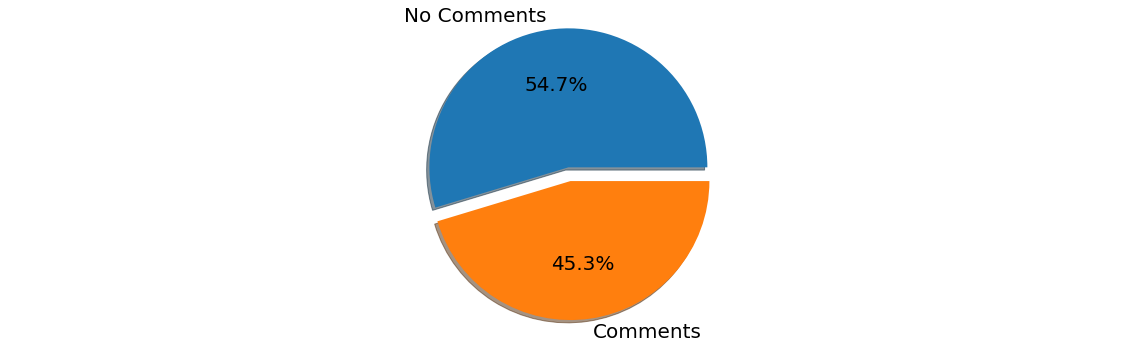

In [14]:
fig, ax1 = plt.subplots(figsize=(20,6))
ax1 = plt.subplot(111)

labels = 'No Comments', 'Comments'

sizes = [zero, nonzero]

ax1.pie(sizes, labels=labels, explode=[0.1,0], autopct='%1.1f%%', shadow=True, textprops={'fontsize':'20'})
ax1.axis('equal')

The above histogram suggests that '>0' may be an interesting threshold. What percentage of records have 0 comments in the next H hours?

In [15]:
print((round(facebook2[facebook2['CommentsNextH_Hours_54']==0]['CommentsNextH_Hours_54'].count() / facebook2['CommentsNextH_Hours_54'].count(), 4)*100), '%')

54.68 %


<b> Threshold: I will select 0 as a threshold. </b> Not only is there an even distribution between records with no comments and at least 1 comment in the next H hours, but the existence of any comments vs. no comments is a natural binary classification.

In [16]:
#### Create binary variable for classification analysis. Apply to both the scaled and unscaled data sets.

facebook2['Comment_Y'] = facebook2['CommentsNextH_Hours_54']>0
facebook2['Comment_Y'] = facebook2['Comment_Y'].apply(int)
facebook2_s['Comment_Y'] = facebook2['Comment_Y']

In [17]:
X = facebook2.iloc[:, 0:27]
y = facebook2.iloc[:, 28:29]
X_s = facebook2_s.iloc[:, 0:27]
y_s = pd.DataFrame(facebook2_s.iloc[:, 28:29])

In [18]:
y.head()

,Comment_Y
0,0
1,0
2,0
3,0
4,0


### Split Data

In [19]:
from sklearn.model_selection import train_test_split

Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_s, test_size=0.3, random_state=4786)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4786)

## Support Vector Machine

In [20]:
SVM1_best = svm.LinearSVC(random_state=3003, C=0.1)
scores1_best = cross_val_score(SVM1_best, Xs_train, ys_train['Comment_Y'], cv=5)
scores1_best

array([ 0.81392577,  0.81545795,  0.80262262,  0.8102861 ,  0.8138624 ])

In [21]:
print("CV Accuracy for Optimal SVM (Linear): ", (round(scores1_best.mean(), 4)*100), "%")

CV Accuracy for Optimal SVM (Linear):  81.12 %


In [22]:
SVM1_best.fit(Xs_train, ys_train['Comment_Y'])

LinearSVC(C=0.1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=3003, tol=0.0001,
     verbose=0)

In [23]:
y_pred_SVM_best = SVM1_best.predict(Xs_train)
y_pred_SVM_test = SVM1_best.predict(Xs_test)

In [24]:
print("Classification Report for SVM- Training: \n\n",classification_report(ys_train, y_pred_SVM_best))

Classification Report for SVM- Training: 

              precision    recall  f1-score   support

          0       0.79      0.89      0.84     16087
          1       0.84      0.72      0.77     13277

avg / total       0.81      0.81      0.81     29364



In [25]:
print("Classification Report for SVM- Testing: \n\n",classification_report(ys_test, y_pred_SVM_test))

Classification Report for SVM- Testing: 

              precision    recall  f1-score   support

          0       0.78      0.88      0.83      6849
          1       0.84      0.71      0.77      5736

avg / total       0.81      0.80      0.80     12585



In [26]:
SVM_train_CM = pd.DataFrame(confusion_matrix(ys_train, y_pred_SVM_best))
SVM_test_CM = pd.DataFrame(confusion_matrix(ys_test, y_pred_SVM_test))

SVM_train_CM.rename(columns={0:'Positive Predicted', 1: 'Negative Predicted'}, inplace=True)
SVM_train_CM.rename(index={0:'Positive', 1: 'Negative'}, inplace=True)
SVM_test_CM.rename(columns={0:'Positive Predicted', 1: 'Negative Predicted'}, inplace=True)
SVM_test_CM.rename(index={0:'Positive', 1: 'Negative'}, inplace=True)

In [27]:
SVM_train_CM

,Positive Predicted,Negative Predicted
Positive,14268,1819
Negative,3751,9526


In [28]:
SVM_test_CM

,Positive Predicted,Negative Predicted
Positive,6048,801
Negative,1673,4063


## Decision Trees

In [29]:
DTC6 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=71, random_state = 3003)
DTC6.fit(Xs_train, ys_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=71, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3003,
            splitter='best')

In [30]:
print(DTC6.tree_)

In [31]:
print("Accuracy for Optimal Decision Tree Model: ", (round(DTC6.score(Xs_train, ys_train), 4)*100), "%")

Accuracy for Optimal Decision Tree Model:  83.46 %


In [32]:
DTC6.fit(Xs_train, ys_train['Comment_Y'])

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=71, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=3003,
            splitter='best')

In [33]:
y_pred_DT_best = DTC6.predict(Xs_train)
y_pred_DT_test = DTC6.predict(Xs_test)

In [34]:
print("Classification Report for DT- Training: \n\n",classification_report(ys_train, y_pred_DT_best))

Classification Report for DT- Training: 

              precision    recall  f1-score   support

          0       0.83      0.88      0.85     16087
          1       0.84      0.78      0.81     13277

avg / total       0.84      0.83      0.83     29364



In [35]:
print("Classification Report for DT- Testing: \n\n",classification_report(ys_test, y_pred_DT_test))

Classification Report for DT- Testing: 

              precision    recall  f1-score   support

          0       0.82      0.87      0.84      6849
          1       0.83      0.77      0.80      5736

avg / total       0.83      0.83      0.82     12585



In [36]:
DT_train_CM = pd.DataFrame(confusion_matrix(ys_train, y_pred_DT_best))
DT_test_CM = pd.DataFrame(confusion_matrix(ys_test, y_pred_DT_test))

DT_train_CM.rename(columns={0:'Positive Predicted', 1: 'Negative Predicted'}, inplace=True)
DT_train_CM.rename(index={0:'Positive', 1: 'Negative'}, inplace=True)
DT_test_CM.rename(columns={0:'Positive Predicted', 1: 'Negative Predicted'}, inplace=True)
DT_test_CM.rename(index={0:'Positive', 1: 'Negative'}, inplace=True)

In [37]:
DT_train_CM

,Positive Predicted,Negative Predicted
Positive,14157,1930
Negative,2928,10349


In [38]:
DT_test_CM

,Positive Predicted,Negative Predicted
Positive,5959,890
Negative,1306,4430


tree_data = tree.export_graphviz (
    DTC6,
    feature_names = X_train.columns
    class_names = 'Comments', 'No_Comments'
    filled=True
    rounded=True
)
graph = graphviz.Source(tree_data)
graph

## Boosting

#### GBM

In [39]:
GBM3 = GradientBoostingClassifier(min_samples_leaf=171, max_depth=6, random_state=3003, learning_rate = 0.05)
scoresG3 = cross_val_score(GBM3, Xs_train, ys_train['Comment_Y'], cv=5)
scoresG3

array([ 0.84116445,  0.84354784,  0.83617166,  0.83787466,  0.83583106])

In [40]:
scoresG3.mean()

0.8389179351300099

In [41]:
GBM3.fit(Xs_train, ys_train['Comment_Y'])

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=6,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=171, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=3003, subsample=1.0, verbose=0,
              warm_start=False)

In [42]:
y_pred_GBM_best = GBM3.predict(Xs_train)
y_pred_GBM_test = GBM3.predict(Xs_test)

In [43]:
print("Classification Report for GBM- Training: \n\n",classification_report(ys_train, y_pred_GBM_best))

Classification Report for GBM- Training: 

              precision    recall  f1-score   support

          0       0.84      0.90      0.87     16087
          1       0.86      0.79      0.82     13277

avg / total       0.85      0.85      0.85     29364



In [44]:
print("Classification Report for GBM- Testing: \n\n",classification_report(ys_test, y_pred_GBM_test))

Classification Report for GBM- Testing: 

              precision    recall  f1-score   support

          0       0.82      0.88      0.85      6849
          1       0.85      0.77      0.81      5736

avg / total       0.83      0.83      0.83     12585



In [45]:
GBM_train_CM = pd.DataFrame(confusion_matrix(ys_train, y_pred_GBM_best))
GBM_test_CM = pd.DataFrame(confusion_matrix(ys_test, y_pred_GBM_test))

GBM_train_CM.rename(columns={0:'Positive Predicted', 1: 'Negative Predicted'}, inplace=True)
GBM_train_CM.rename(index={0:'Positive', 1: 'Negative'}, inplace=True)
GBM_test_CM.rename(columns={0:'Positive Predicted', 1: 'Negative Predicted'}, inplace=True)
GBM_test_CM.rename(index={0:'Positive', 1: 'Negative'}, inplace=True)

In [46]:
GBM_train_CM

,Positive Predicted,Negative Predicted
Positive,14434,1653
Negative,2808,10469


In [47]:
GBM_test_CM

,Positive Predicted,Negative Predicted
Positive,6060,789
Negative,1317,4419
